<a href="https://colab.research.google.com/github/shubdas9902/Deep-Learning-Projects/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

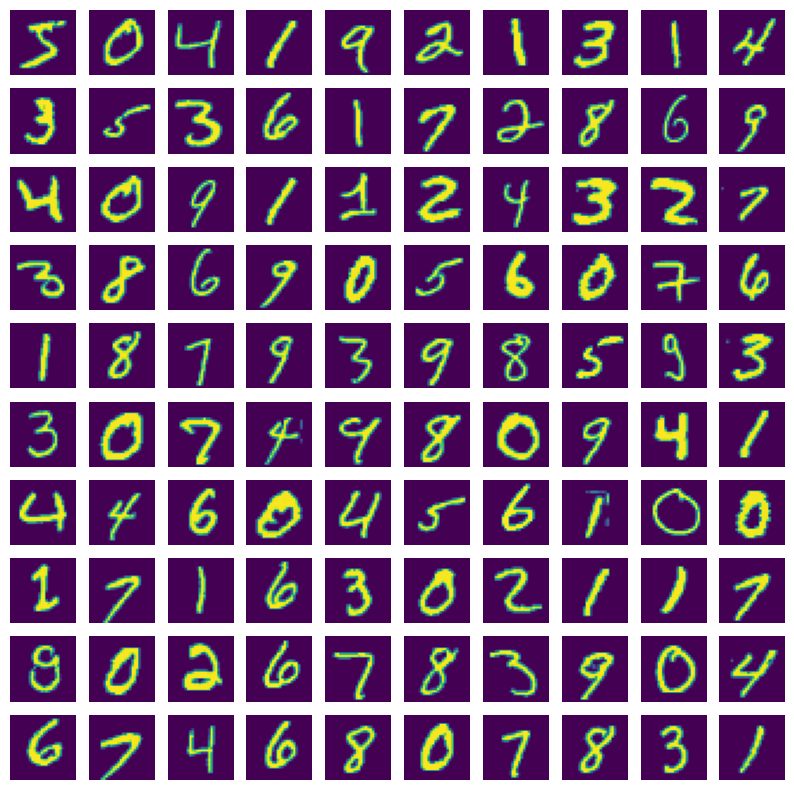

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig, ax = plt.subplots(10, 10, figsize=(10, 10))
k = 0
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(x_train[k], aspect='auto')
        ax[i, j].axis('off')
        k += 1
plt.show()

In [32]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [33]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [34]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [35]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [36]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8556 - loss: 0.4859 - val_accuracy: 0.9606 - val_loss: 0.1342
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9645 - loss: 0.1194 - val_accuracy: 0.9657 - val_loss: 0.1163
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9765 - loss: 0.0771 - val_accuracy: 0.9692 - val_loss: 0.1035
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9822 - loss: 0.0575 - val_accuracy: 0.9717 - val_loss: 0.0996
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9848 - loss: 0.0478 - val_accuracy: 0.9729 - val_loss: 0.0987


In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.1036

Test accuracy: 0.9750000238418579


In [40]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [41]:
label_for_first_test_image = np.argmax(predictions[0])
print("Predicted label for the first test image:", label_for_first_test_image)


Predicted label for the first test image: 7


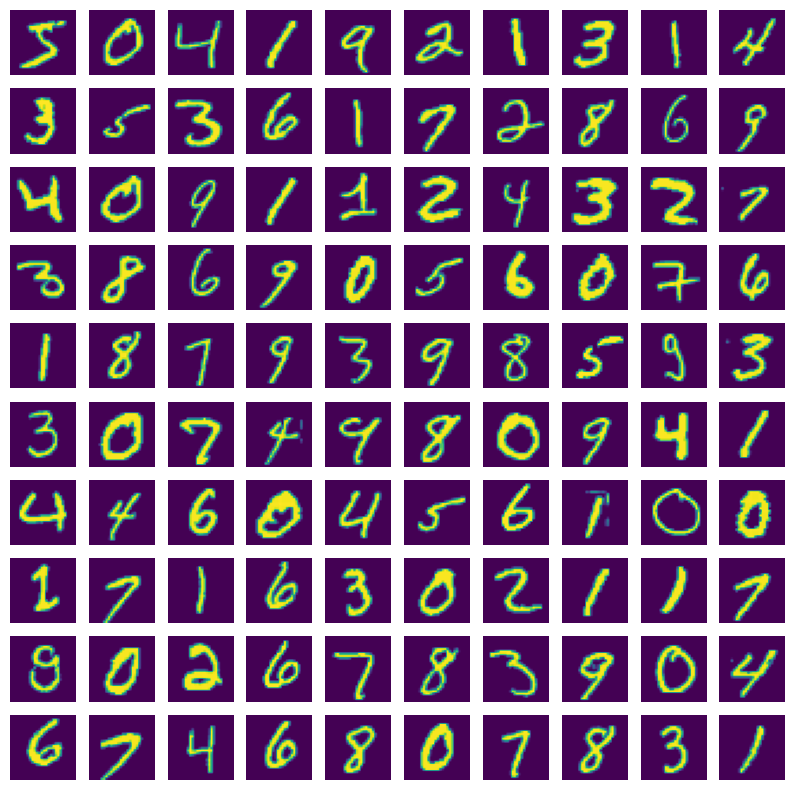

In [26]:
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
k = 0
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(x_train[k], aspect='auto')
        ax[i, j].axis('off')
        k += 1
plt.show()

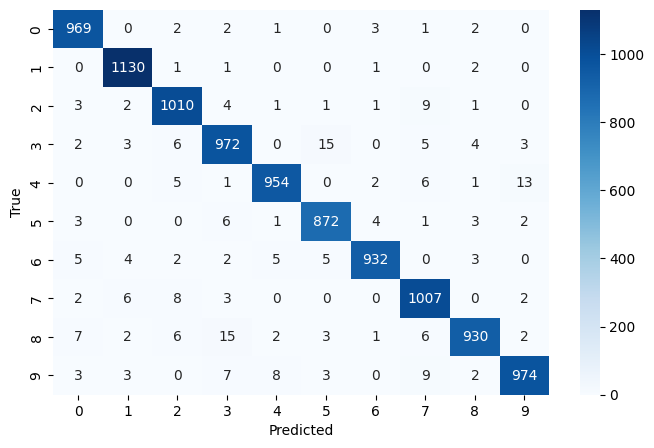

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(predictions, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_labels, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

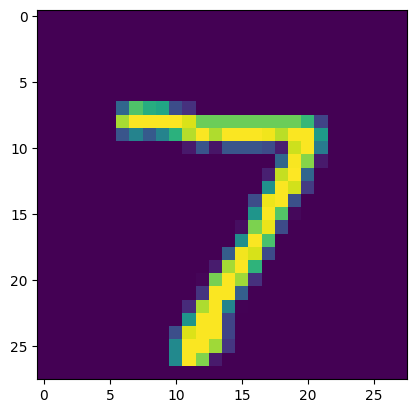

In [43]:
plt.imshow(x_test[0])
plt.show()